In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dnn_play.classifiers.softmax import Softmax, softmax_loss, rel_err_gradients
from dnn_play.utils.data_utils import load_mnist
from dnn_play.utils.visualize_utils import display_network


# Plot settings
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Load MNIST data
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_mnist()
#(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_mnist(n_train=9000, n_val=1000, n_test=1000)

print("X_train shape = {} y_train shape = {}".format(X_train.shape, y_train.shape))
print("X_val   shape = {} y_val  shape = {}".format(X_val.shape, y_val.shape))
print("X_test  shape = {} y_test shape = {}".format(X_test.shape, y_test.shape))

X_train shape = (784, 55000) y_train shape = (55000,)
X_val   shape = (784, 5000) y_val  shape = (5000,)
X_test  shape = (784, 10000) y_test shape = (10000,)


In [11]:
# Sanity check of softmax loss function

# Number of layer units
input_size  = X_train.shape[0] # Dimension of features
n_classes = np.max(y_train) + 1

layer_units = (input_size, n_classes)

# Hyperparameters
reg = 1e-4

# Numerical parameters
max_iters = 400

# Define classifier
clf = Softmax(layer_units)
weights = clf.init_weights()

loss, grad = softmax_loss(weights, X_train, y_train, 0.0)

# Note there are 10 classes.
# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))


loss: 2.302530
sanity check: 2.302585


In [15]:
# Gradient checking
if rel_err_gradients() < 1e-8:
    print("Gradient check passed!")
else:
    print("Gradient check failed!") 

Gradient check passed!


In [5]:
"""
Training
"""

model, loss_history, train_acc_history, val_acc_history = clf.fit(X_train, y_train, X_val, y_val, 
                                                                  reg=reg, max_iters=max_iters, verbose=True)   

iter:   20, loss: 0.325791, train_acc: 0.909036, val_acc: 0.928800
iter:   40, loss: 0.284069, train_acc: 0.923273, val_acc: 0.937000
iter:   60, loss: 0.272061, train_acc: 0.927273, val_acc: 0.939600
iter:   80, loss: 0.267148, train_acc: 0.930764, val_acc: 0.942400
iter:  100, loss: 0.264786, train_acc: 0.931800, val_acc: 0.941800
iter:  120, loss: 0.263709, train_acc: 0.932655, val_acc: 0.941800
iter:  140, loss: 0.263230, train_acc: 0.932382, val_acc: 0.941800
iter:  160, loss: 0.262966, train_acc: 0.932655, val_acc: 0.942000
iter:  180, loss: 0.262849, train_acc: 0.932873, val_acc: 0.942600
iter:  200, loss: 0.262792, train_acc: 0.933055, val_acc: 0.942400
iter:  220, loss: 0.262766, train_acc: 0.933127, val_acc: 0.942400
iter:  240, loss: 0.262751, train_acc: 0.933000, val_acc: 0.942200
iter:  260, loss: 0.262745, train_acc: 0.933055, val_acc: 0.942400


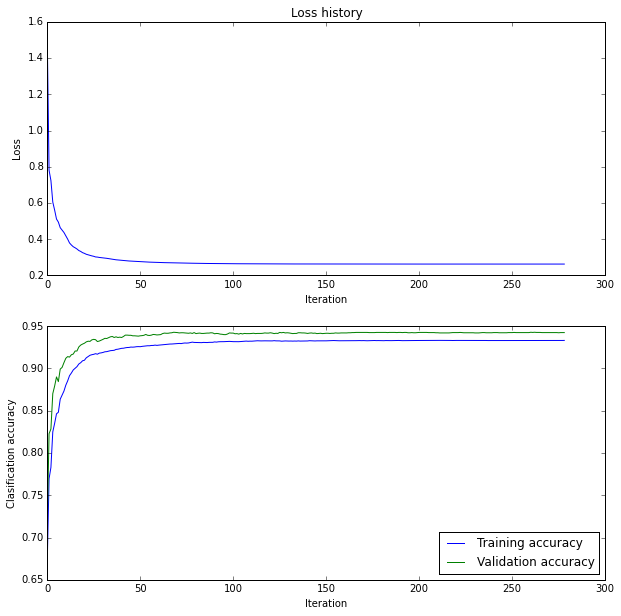

In [6]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.xlabel('Iteration')
plt.ylabel('Clasification accuracy')

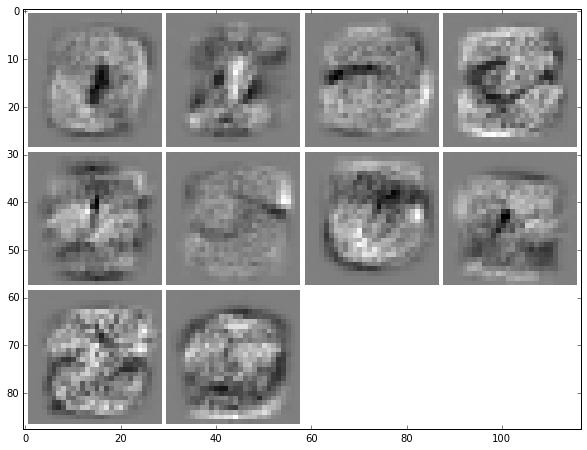

In [7]:
# Visualize the weights 

W0 = model[0]['W']
image = display_network(W0.T)
plt.imshow(image, cmap = plt.cm.gray)

In [8]:
# Make predictions

pred = clf.predict(X_test)

acc = np.mean(y_test == pred)
print("Accuracy: {:5.2f}% \n".format(acc*100))


Accuracy: 92.43% 



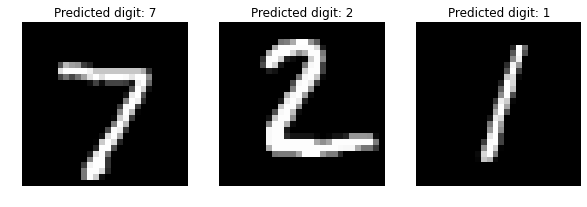

In [9]:
# View some images and predictions
n_images = 3
images = X_test[:, :n_images].reshape((28, 28, n_images))
pred = clf.predict(X_test[:, :n_images])

for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(images[:, :, i], cmap = plt.cm.gray)
    plt.title('Predicted digit: {}'.format(pred[i]))
    plt.axis('off')

    